# DeepLabCut Toolbox - demo for post processing

https://github.com/AlexEMG/DeepLabCut

In [12]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
# this is example data from the public project: https://github.com/AlexEMG/DeepLabCut/tree/master/examples/openfield-Pranav-2018-10-30
video='triangulo-invisivel.mp4'
DLCscorer='DLC_resnet_50_ictestemar12shuffle1_566500'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
Dataframe = pd.read_hdf(os.path.join(dataname))


In [14]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.head()

scorer    DLC_resnet_50_ictestemar12shuffle1_566500                       
bodyparts                                   pcaneta                       
coords                                            x           y likelihood
0                                         90.067596  326.462769   0.999999
1                                         92.388321  321.978546   0.999999
2                                         91.758865  315.608276   0.999985
3                                         99.323418  310.036743   0.999999
4                                        102.358788  303.124725   0.999996

In [15]:
Dataframe

scorer    DLC_resnet_50_ictestemar12shuffle1_566500                       
bodyparts                                   pcaneta                       
coords                                            x           y likelihood
0                                         90.067596  326.462769   0.999999
1                                         92.388321  321.978546   0.999999
2                                         91.758865  315.608276   0.999985
3                                         99.323418  310.036743   0.999999
4                                        102.358788  303.124725   0.999996
..                                              ...         ...        ...
245                                       98.152649  331.057068   0.999999
246                                       98.497536  330.811218   0.999999
247                                       99.323158  330.761353   0.999998
248                                       99.860680  330.653717   0.999998
249                                      100.674355  330.442657   0.999999

[250 rows x 3 columns]

In [16]:
## Gerando base de dados do vídeo
Dataframe.to_csv('basededados.csv')

In [17]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:

## import deeplabcut
## deeplabcut.utils.plotting.PlottingResults?

In [18]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    #COMENTAR DAQUI PARA BAIXO
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

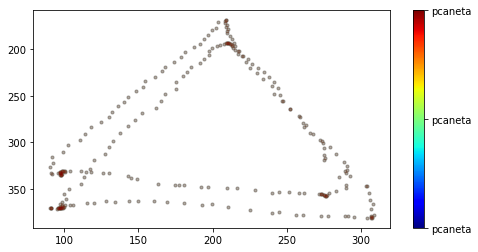

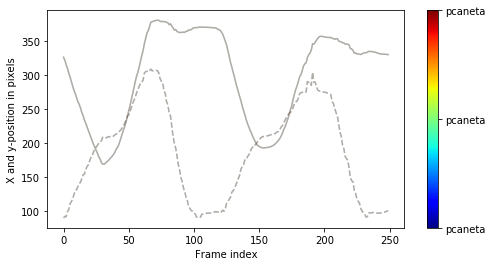

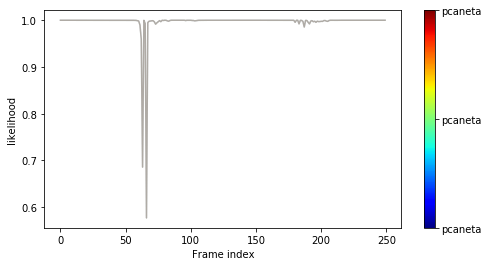

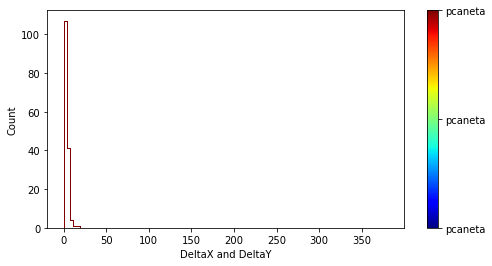

In [19]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

## Great so let's use Federico's code for ROI analysis

Functions to extract time spent by the mouse in each of a list of user defined ROIS!

https://github.com/AlexEMG/DLCutils/blob/master/time_in_each_roi.py

In [20]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snout
bpt='snout'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=30 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=Dataframe[DLCscorer][bpt]['x'].values
ysnout=Dataframe[DLCscorer][bpt]['y'].values
vsnout=vel

KeyError: 'snout'

In [21]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.show()

NameError: name 'time' is not defined

In [22]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 0), (300, 480)),'rightside': position((300, 0), (640, 480))} 
print(rois)

NameError: name 'xsnout' is not defined

NameError: name 'xsnout' is not defined

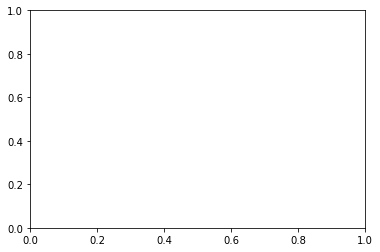

In [23]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(xsnout,ysnout,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-11,491)
plt.show()

In [24]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30)

#print results:
res

NameError: name 'bp_tracking' is not defined